<a href="https://colab.research.google.com/github/solllull/entregasML/blob/main/tp1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos | Lluvias en Australia

El dataset elegido contiene datos de aproximadamente 10 años de observaciones meteorológicas diarias de muchos lugares de Australia.

###**LISTADO DE VARIABLES Y SELECCIÓN**

#### VARIABLES DE ENTRADA

#### Utilizadas

* Date: fecha de observación.
* Location: nombre común de la ubicación de la estación meteorológica.
* MinTemp: temperatura mínima en grados centígrados.
* MaxTemp: temperatura máxima en grados centígrados.
* Rainfall: la cantidad de lluvia registrada para el día en mm.
* Evaporation: la llamada evaporación de la bandeja de clase A (mm) en las 24 horas anteriores a las 9 am.
* Sunshine: número de horas de sol brillante en el día.
* Humidity9am: humedad (porcentaje) a las 9 am.
* Humidity3pm: humedad (porcentaje) a las 3 pm.
* Pressure9am: presión atmosférica (hpa) reducida al nivel medio del mar a las 9 am.
* Pressure3pm: presión atmosférica (hpa) reducida al nivel medio del mar a las 3 pm.
* Cloud9am: fracción del cielo oscurecida por las nubes a las 9 am. Esto se mide en “octas”, que son una unidad de octavos. Registra cuántos octavos del cielo están oscurecidos por las nubes. Una medida 0 indica cielo completamente despejado, mientras que un 8 indica que está completamente nublado.
* Cloud3pm: fracción de cielo oscurecida por nubes (en “octas”: octavos) a las 3 pm.
* RainToday: booleano. 1 si la precipitación (mm) en las 24 horas anteriores a las 9 am excede 1 mm, de lo contrario 0.
* WindGustDir: dirección de la ráfaga de viento más fuerte en las 24 horas anteriores a la medianoche.
* WindGustSpeed: velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas anteriores a la medianoche.
* WindDir9am: dirección del viento a las 9 am.
* WindDir3pm: dirección del viento a las 3 pm.
* WindSpeed9am: velocidad del viento (km/h) promediada durante 10 minutos antes de las 9 am.
* WindSpeed3pm: velocidad del viento (km/h) promediada durante 10 minutos antes de las 3 pm.
* Temp9am: temperatura (grados centígrados) a las 9 am.
* Temp3pm: temperatura (grados centígrados) a las 3 pm.


Tras analizar las variables de entrada, decidimos no dejar ninguna de lado y utilizarlas en su totalidad, ya que todas contienen información posiblemente importante para la predicción.

#### VARIABLE DE SALIDA

* RainTomorrow: si, dados los datos de un día, lloverá o no al día siguiente. Se considera que sí llovió, a partir de 1mm. Valores posibles: Yes, No.


###**INFORMACIÓN DEL DATASET**

In [ ]:
# importamos herramientas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from datetime import datetime
from matplotlib import gridspec
import plotly.express as px

In [ ]:
# importamos el dataset
dataset = pd.read_csv('weatherAUS.csv')
dataset.sample(5)

Date     Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
41603   2014-11-25  Williamtown     19.2  ...     21.9        Yes            No
108407  2017-01-13      Woomera     23.6  ...     23.4        Yes           Yes
44404   2014-03-31   Wollongong     18.0  ...     23.4        Yes            No
114259  2016-06-30  Witchcliffe      8.3  ...     14.5         No            No
144351  2014-06-13        Uluru      3.6  ...     17.0         No            No

[5 rows x 23 columns]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
dataset.shape

(145460, 23)

In [ ]:
# tipo de datos de cada columna
dataset.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
# cantidad de valores nulos por columna
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

####**LIMPIEZA Y PRE-PROCESADO**


El dataset original cuenta con una gran cantidad de datos, distribuidos en 145460 filas y 23 columnas. De las columnas, utilizaremos todas porque consideramos que ninguna es prescindible. 
Dado que hay gran cantidad de valores nulos, decidimos eliminar dichas filas y trabajar con las restantes, que aún así son bastantes.

In [ ]:
# eliminar nulos
dataset = dataset.dropna(how='any',axis=0)
dataset.shape

(56420, 23)

In [ ]:
dataset.describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  56420.000000  56420.000000  ...  56420.000000  56420.000000
mean      13.464770     24.219206  ...     18.204961     22.710333
std        6.416689      6.970676  ...      6.567991      6.836543
min       -6.700000      4.100000  ...     -0.700000      3.700000
25%        8.600000     18.700000  ...     13.100000     17.400000
50%       13.200000     23.900000  ...     17.800000     22.400000
75%       18.400000     29.700000  ...     23.300000     27.900000
max       31.400000     48.100000  ...     39.400000     46.100000

[8 rows x 16 columns]

Observando la tabla anterior, vemos que los valores numéricos (teniendo en cuenta min y max), no están en el mismo rango. Por ende, decidimos escalar todas las columnas numéricas para que tomen valores en el rango (0, 1) y mantengan la propoción de los datos.

In [ ]:
dataset[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']] = minmax_scale(dataset[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']])

In [ ]:
dataset.sample(5)

Date       Location   MinTemp  ...   Temp3pm  RainToday  RainTomorrow
121467  2010-10-08          Perth  0.414698  ...  0.627358         No            No
22750   2013-09-17  NorfolkIsland  0.553806  ...  0.332547        Yes            No
12622   2010-07-10          Moree  0.330709  ...  0.412736         No            No
67438   2009-02-24      Melbourne  0.551181  ...  0.393868         No           Yes
67836   2010-03-29      Melbourne  0.645669  ...  0.455189        Yes            No

[5 rows x 23 columns]

In [ ]:
# convertir columna "Date" de tipo object/string, a datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

###**ANÁLISIS DETALLADO DE UN CONJUNTO DE VARIABLES**


#### 1) Para la variable de salida, explicar y graficar su balanceo y qué consecuencias va a tener eso a la hora de entrenar modelos.

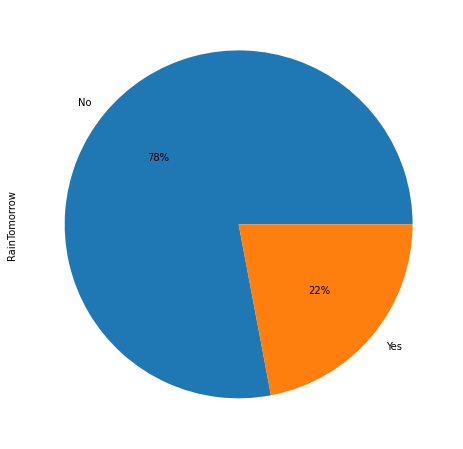

In [ ]:
dataset.RainTomorrow.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

En el gráfico podemos ver que hay un gran desbalanceo entre los dos valores de salida.
Por un lado tenemos un 78% de casos donde no llueve al día siguiente, y por otro lado, tenemos un 22% con resultado positivo.
Esto, por lo general afecta a los algoritmos en su proceso de generalización de la información y perjudicando a la clase minoritaria.
Le será dificil al algoritmo lograr diferenciar una clase de otra. Lo más probable es que la red se limite a responder en la mayoría de los casos “no lloverá” puesto que así tendrá un buen acierto en su fase de entrenamiento. 

#### 2) Para 5 variables de entrada (elegidas o no, pero incluyendo al menos 3 elegidas) graficar y explicar cómo se comportan y cómo afectan a la variable de salida.

**MaxTemp**

In [ ]:
px.scatter(dataset, x=dataset.MaxTemp, y=dataset.Date.dt.month_name(), color = "RainTomorrow", title="Temperaturas máximas en cada mes")

In [ ]:
px.box(dataset, x="RainTomorrow", y="MaxTemp", points="all", color="RainTomorrow")

Sobre ambos gráficos se puede decir que no se nota una tendencia bien marcada de la variable MaxTemp respecto a RainTomorrow. 
Sin embargo, en el primer gráfico (temperaturas máximas de cada mes), se evidencia que en los meses más calurosos, hay más lluvias, cuando la temperatura máxima alcanza valores más altos que en los demás meses.
Aparte de lo anterior, teniendo en cuenta todos los meses y las temperaturas más bajas, también se observa una cantidad notable de días de lluvia (parte izquierda del primer gráfico). En cambio, a la derecha del gráfico (temperaturas muy altas), se muestran pocas lluvias, lo cual podría implicar sequías, por ejemplo.

En cuanto al gráfico de cajas, confirma la suposición de la distribución similar de la variable MaxTemp respecto a RainTomorrow. Si nos centramos en el valor positivo de RainTomorrow, la caja roja, al estar desplazada hacia abajo (un poco más que la caja azul) nos indica que a menores temperaturas puede haber más lluvias. En el caso de la caja azul, siendo el bigote superior más largo, demuestra lo que se indicó en el gráfico anterior, que a temperaturas extremas, casi no se registran lluvias.


**Humidity9am**

In [ ]:
px.histogram(dataset, x="Humidity9am", color="RainTomorrow", barmode="group")

En el histograma se observa que mientras mayor es el porcentaje de humedad a las 9 am en un día, más probable es que al día siguiente llueva.


**RainToday**

In [ ]:
fig = px.bar(dataset, x="RainToday", color="RainTomorrow")
fig.show()

In [ ]:
px.histogram(dataset, x="RainToday", color="RainTomorrow", barmode="group")

Con este gráfico podemos ver que cuando no llueve, en la mayoría de los casos al día siguiente, tampoco llueve. En días que si llueve, predominan también los casos en los que no llueve al día siguiente, pero disminuyen bruscamente.
Es decir, si llueve hoy, hay un 46% de que mañana llueva, de lo contrario (si hoy no llueve), hay un 15% de que mañana si.
Por lo tanto, estas variables se relacionan, "RainToday" si influye en la variable de salida "RainTomorrow".

**Sunshine**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



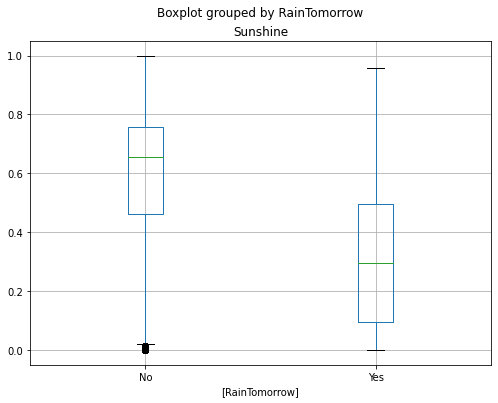

In [ ]:
dataset[dataset.Sunshine.notnull()][["RainTomorrow", "Sunshine"]].boxplot(by='RainTomorrow', figsize=(8, 6))


El gráfico de cajas muestra la distribución de la cantidad de horas de sol durante el día, tanto para los días siguientes donde no lloverá (valor 0) como para los que si lloverá (valor 1).
A simple vista, se puede observar que la caja correspondiente a los registros que contienen la variable RainTomorrow igual a "Yes", se encuentra por debajo de la caja que contiene los valores con la variable RainTomorrow igual a "No". Esto se puede traducir en que, a menor cantidad de horas de sol durante el día, es más probable que al día siguiente llueva.

**Location**

<Figure size 3600x3600 with 0 Axes>

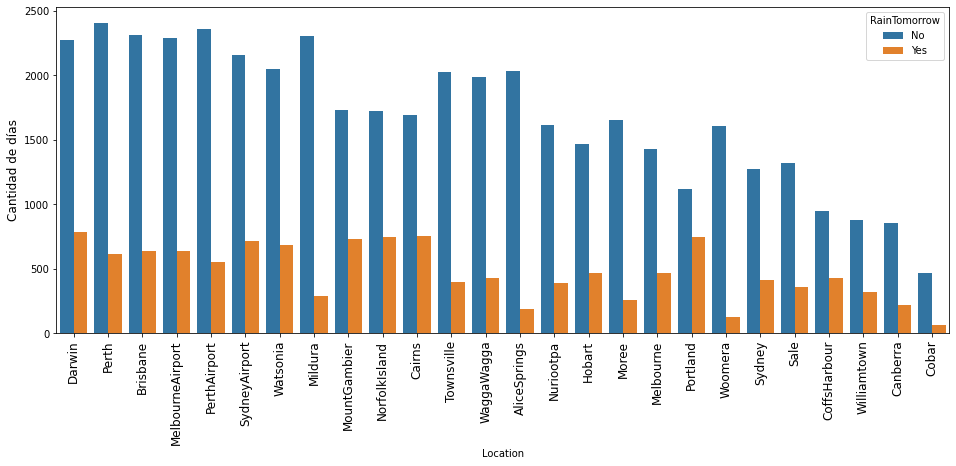

In [ ]:
plt.figure(figsize=(50,50))
f,ax=plt.subplots(1,1,figsize=(16,6))
sns.countplot(x='Location', data=dataset, hue='RainTomorrow',order = dataset['Location'].value_counts().iloc[:30].index)
ax.set_ylabel('Cantidad de días', fontsize=12) 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize = 12)
plt.show()

En el gráfico de barras se visualiza por localidad, la cantidad de registros que poseen cada posible valor de la variable 'RainTomorrow'.
A rasgos generales, analizando cada Localidad por su cantidad de registros, no se visualiza ninguna que posea mayor o menor proporción de días siguientes en los que lloverá. Se interpreta que no existen zonas más propensas a lluvias que otras.

#### 3) Verificar si existen variables altamente correlacionadas con la variable "target". En dicho caso, explicar por qué considera que esto pasa.

**Correlación de variables**

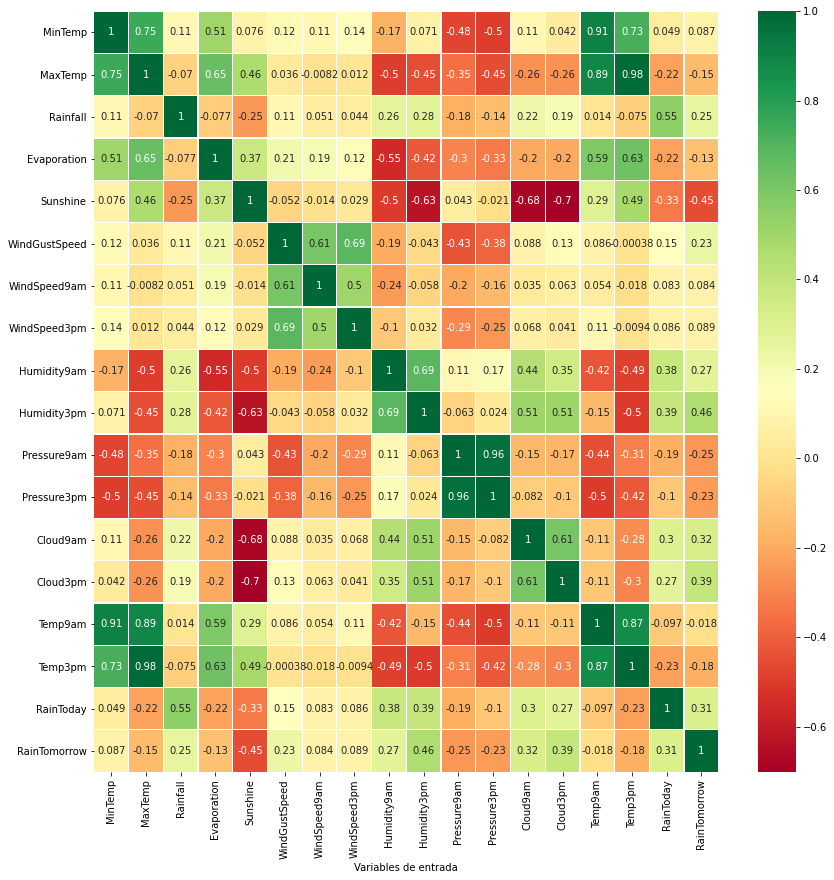

In [ ]:
dataset["RainToday"] = dataset.RainToday.replace(['No', 'Yes'], [0, 1])
dataset["RainTomorrow"] = dataset.RainTomorrow.replace(['No', 'Yes'], [0, 1])
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,14)
plt.xlabel('Variables de entrada')
plt.show()

A partir del gráfico, se puede deducir que las variables que están más correlacionadas con el target (RainTomorrow), son: 
- **Sunshine**, con valor -0.45: se interpreta que a menor cantidad de sol, más probabilidades hay que llueva al día siguiente.
- **Humedad a las 3 pm**, con valor 0.46: más humedad, más probabilidad de que llueva al día siguiente.
- **Nubosidad a las 9 am y 3 pm**, con valores 0.32 y 0.39 respectivamente: a mayor cantidad de octavos de cielo cubiertos por nubes, más probabilidades hay de que llueva al día siguiente.